# 📊 Benchmark Visualization Dashboard
This notebook visualizes metrics collected from anomaly detection benchmark runs.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the cleaned benchmark metrics
df = pd.read_csv('benchmark_metrics_clean.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.head()

,timestamp,test_case_id,device_type,csv_file,inference_time_ms,cpu_percent,memory_mb,disk_read_mb,disk_write_mb
0,2025-05-01 12:56:29.963104,1,motor_monitor,motor_monitor_0_unified.csv,3533.31,5.15,13624.68,0.0625,0.7539
1,2025-05-01 12:56:36.888401,1,bale_counter,bale_counter_0_unified.csv,6922.59,2.10,13702.41,0.0156,0.8242
2,2025-05-01 12:56:43.732273,1,output_sensor,output_sensor_0_unified.csv,6842.35,2.05,13670.56,0.0312,1.3164
3,2025-05-01 12:56:51.235347,1,temperature_sensor,temperature_sensor_0_unified.csv,7501.10,2.35,13828.19,2.2578,18.5547
4,2025-05-01 12:56:54.494801,1,motor_monitor,motor_monitor_0_unified.csv,3257.02,2.20,13834.81,0.0625,6.2070


## 📈 Group by Test Case and Device Type

In [2]:
grouped = df.groupby(['test_case_id', 'device_type']).agg({
    'inference_time_ms': ['mean', 'max', 'min', 'std'],
    'cpu_percent': ['mean', 'max', 'min', 'std'],
    'memory_mb': ['mean', 'max', 'min', 'std'],
    'disk_read_mb': ['mean'],
    'disk_write_mb': ['mean']
}).reset_index()
grouped.columns = ['_'.join(col).strip('_') for col in grouped.columns.values]
grouped.head()

,test_case_id,device_type,inference_time_ms_mean,inference_time_ms_max,inference_time_ms_min,inference_time_ms_std,cpu_percent_mean,cpu_percent_max,cpu_percent_min,cpu_percent_std,memory_mb_mean,memory_mb_max,memory_mb_min,memory_mb_std,disk_read_mb_mean,disk_write_mb_mean
0,1,bale_counter,12417.946230,20960.91,6756.39,5214.753297,1.972541,10.15,1.40,1.056172,7217.246475,14064.05,569.13,6617.010611,1.635239,5.042746
1,1,motor_monitor,6128.819344,10990.64,3213.67,3046.411906,3.201639,52.05,1.90,5.003288,7218.932541,14041.03,501.18,6625.162314,0.068762,2.238951
2,1,output_sensor,12472.309508,22054.86,6842.35,5484.345279,2.018033,8.85,1.45,1.049932,7217.153852,14097.31,556.22,6619.728377,3.746207,9.542070
3,1,temperature_sensor,12539.724545,23547.01,7008.81,5589.999451,2.054545,18.40,1.40,1.740857,7276.998512,14069.94,583.56,6621.453626,0.230638,8.414674
4,2,bale_counter,10686.944083,19101.83,7346.71,4206.080350,2.079167,8.85,1.50,1.080180,7503.478917,14320.73,812.30,6623.386854,0.155750,4.453997


## 📊 Inference Time per Device Type

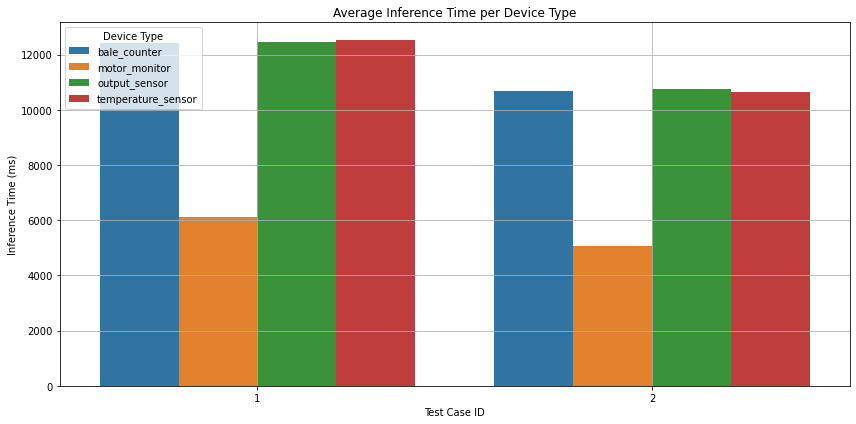

In [3]:
plt.figure(figsize=(12,6))
sns.barplot(data=grouped, x='test_case_id', y='inference_time_ms_mean', hue='device_type')
plt.title('Average Inference Time per Device Type')
plt.ylabel('Inference Time (ms)')
plt.xlabel('Test Case ID')
plt.legend(title='Device Type')
plt.grid(True)
plt.tight_layout()
plt.show()

## 📊 CPU and Memory Usage

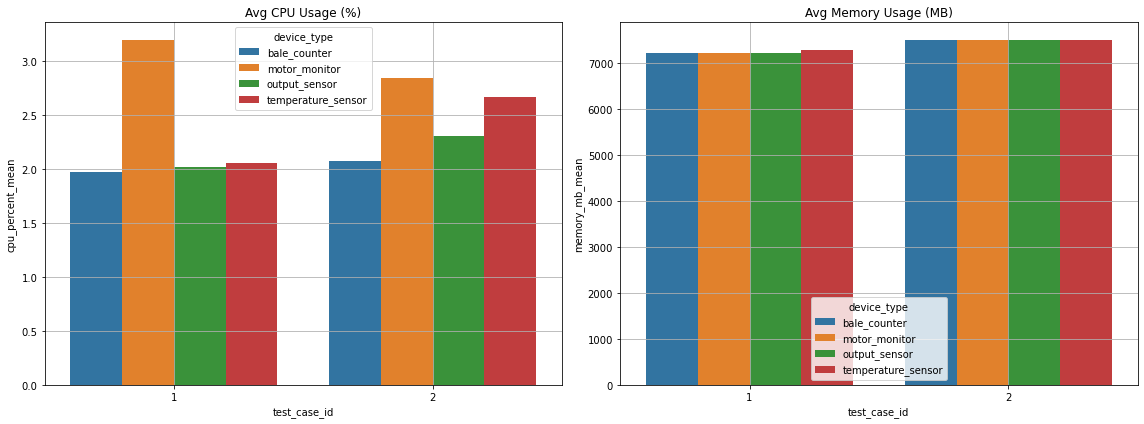

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))
sns.barplot(data=grouped, x='test_case_id', y='cpu_percent_mean', hue='device_type', ax=axes[0])
axes[0].set_title('Avg CPU Usage (%)')
axes[0].grid(True)
sns.barplot(data=grouped, x='test_case_id', y='memory_mb_mean', hue='device_type', ax=axes[1])
axes[1].set_title('Avg Memory Usage (MB)')
axes[1].grid(True)
plt.tight_layout()
plt.show()

## 💾 Disk Read/Write

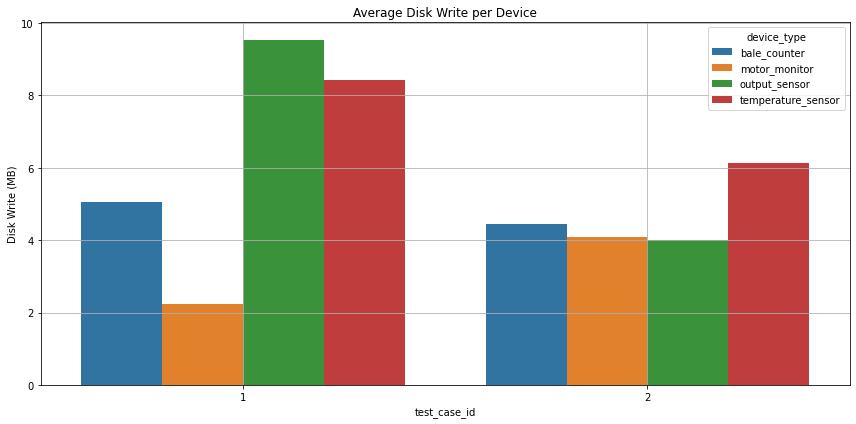

In [5]:
plt.figure(figsize=(12,6))
sns.barplot(data=grouped, x='test_case_id', y='disk_write_mb_mean', hue='device_type')
plt.title('Average Disk Write per Device')
plt.ylabel('Disk Write (MB)')
plt.grid(True)
plt.tight_layout()
plt.show()